In [1]:
import os
import pandas as pd

# ----- Configuration -----
# Path to the rain data folder
data_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"

# Path to save the statistics data
output_folder = os.path.join(os.path.dirname(data_folder), "statistics_data")
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

# List all files in the data folder
files = os.listdir(data_folder)

# Extract unique years from filenames (assuming format: North_Dead_Sea_RMYYYY_Arugot.csv)
years = sorted(set(f.split("_")[3] for f in files if f.endswith(".csv")))

print("Processing years:", years)

# ----- Function to Compute Statistics -----
def compute_statistics(df, region_name):
    """ Compute statistical measures for a given DataFrame and return formatted results. """
    if df.empty:
        return None  # Skip empty datasets

    grouped = df.groupby("time")["rainrate"].agg(
        average_rain_rate="mean",
        sum_rain_rate="sum",
        median_rain_rate="median",
        percentile_90=lambda x: x.quantile(0.9)
    ).reset_index()

    grouped["region"] = region_name  # Add region column
    return grouped

# ----- Process Each Year -----
for year in years:
    print(f"\nProcessing Year: {year}")

    # Define file paths
    arugot_file = os.path.join(data_folder, f"North_Dead_Sea_RM{year}_Arugot.csv")
    darga_file = os.path.join(data_folder, f"North_Dead_Sea_RM{year}_Darga.csv")

    # Load data if available
    arugot_df = pd.read_csv(arugot_file, parse_dates=["time"]) if os.path.exists(arugot_file) else None
    darga_df = pd.read_csv(darga_file, parse_dates=["time"]) if os.path.exists(darga_file) else None

    # Compute statistics per region
    stats_arugot = compute_statistics(arugot_df, "Arugot") if arugot_df is not None else None
    stats_darga = compute_statistics(darga_df, "Darga") if darga_df is not None else None

    # Compute overall statistics (combining both regions)
    if arugot_df is not None and darga_df is not None:
        combined_df = pd.concat([arugot_df, darga_df], ignore_index=True)
    elif arugot_df is not None:
        combined_df = arugot_df
    elif darga_df is not None:
        combined_df = darga_df
    else:
        print(f"  No valid data found for {year}. Skipping.")
        continue  # Skip this year

    stats_all = compute_statistics(combined_df, "all")

    # Combine all statistics
    final_df = pd.concat([stats_all, stats_arugot, stats_darga], ignore_index=True)
    final_df = final_df[["time", "region", "average_rain_rate", "sum_rain_rate", "median_rain_rate", "percentile_90"]]
    final_df.sort_values(by=["time", "region"], inplace=True)

    # Save the statistics CSV
    output_file = os.path.join(output_folder, f"North_Dead_Sea_RM{year}_statistics.csv")
    final_df.to_csv(output_file, index=False)
    print(f"  Saved statistics to: {output_file}")

print("\nAll years processed successfully!")


Processing years: ['RM2012', 'RM2013', 'RM2014', 'RM2015', 'RM2016', 'RM2018', 'RM2019', 'RM2020']

Processing Year: RM2012
  No valid data found for RM2012. Skipping.

Processing Year: RM2013
  No valid data found for RM2013. Skipping.

Processing Year: RM2014
  No valid data found for RM2014. Skipping.

Processing Year: RM2015
  No valid data found for RM2015. Skipping.

Processing Year: RM2016
  No valid data found for RM2016. Skipping.

Processing Year: RM2018
  No valid data found for RM2018. Skipping.

Processing Year: RM2019
  No valid data found for RM2019. Skipping.

Processing Year: RM2020
  No valid data found for RM2020. Skipping.

All years processed successfully!


Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2012_Arugot.csv


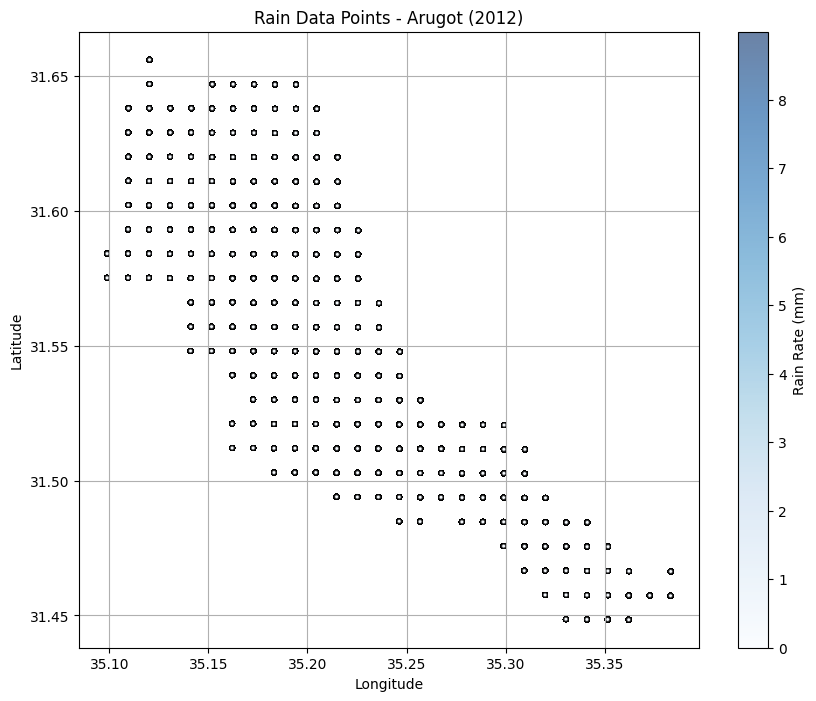

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ----- Configuration -----
# Path to the Arugot rain file for 2012
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2012_Arugot.csv"

# ----- Load Data -----
# Load the rain data
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded: {file_path}")
else:
    print(f"File not found: {file_path}")

# Check if necessary columns exist
if "longitude" not in df.columns or "latitude" not in df.columns or "rainrate" not in df.columns:
    raise ValueError("Missing required columns: 'long', 'lat', or 'rainrate' in the CSV file.")

# ----- Plot the Rain Points -----
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for rain points
sc = ax.scatter(
    df["longitude"], df["latitude"], 
    c=df["rainrate"], cmap="Blues", alpha=0.6, edgecolors="k", marker="o", 
    s=10  # Size of points
)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Rain Rate (mm)")

# Labels and title
ax.set_title("Rain Data Points - Arugot (2012)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)

# Show plot
plt.show()


Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2012_Darga.csv


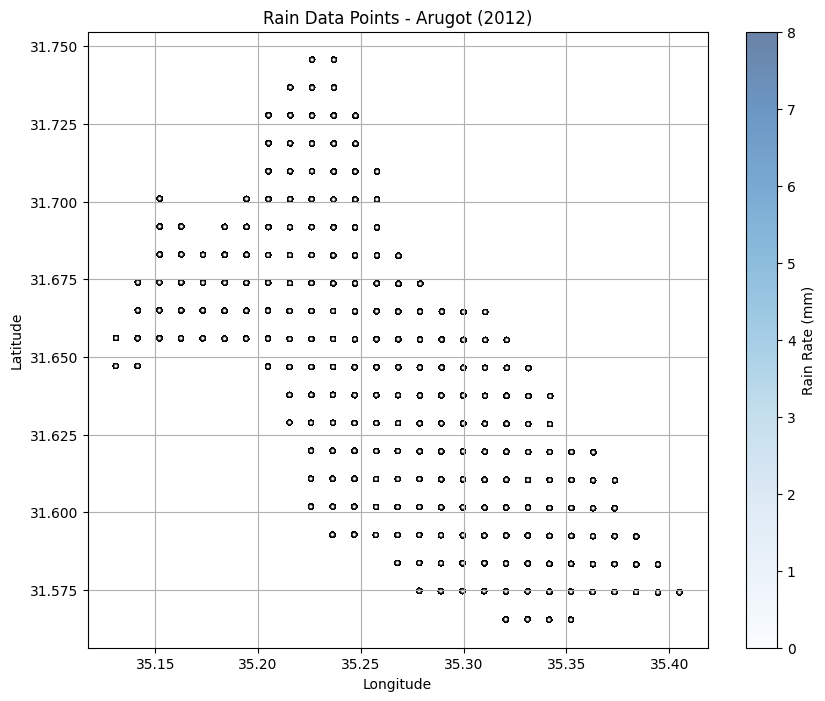

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ----- Configuration -----
# Path to the Arugot rain file for 2012
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2012_Darga.csv"

# ----- Load Data -----
# Load the rain data
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded: {file_path}")
else:
    print(f"File not found: {file_path}")

# Check if necessary columns exist
if "longitude" not in df.columns or "latitude" not in df.columns or "rainrate" not in df.columns:
    raise ValueError("Missing required columns: 'long', 'lat', or 'rainrate' in the CSV file.")

# ----- Plot the Rain Points -----
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for rain points
sc = ax.scatter(
    df["longitude"], df["latitude"], 
    c=df["rainrate"], cmap="Blues", alpha=0.6, edgecolors="k", marker="o", 
    s=10  # Size of points
)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Rain Rate (mm)")

# Labels and title
ax.set_title("Rain Data Points - Arugot (2012)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)

# Show plot
plt.show()


Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2013_Arugot.csv


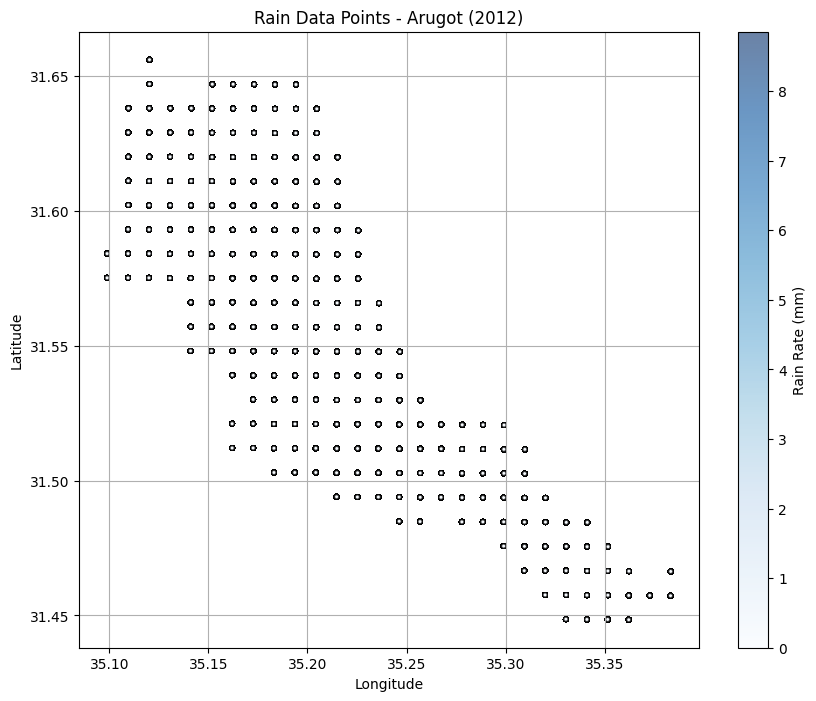

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ----- Configuration -----
# Path to the Arugot rain file for 2012
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2013_Arugot.csv"

# ----- Load Data -----
# Load the rain data
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded: {file_path}")
else:
    print(f"File not found: {file_path}")

# Check if necessary columns exist
if "longitude" not in df.columns or "latitude" not in df.columns or "rainrate" not in df.columns:
    raise ValueError("Missing required columns: 'long', 'lat', or 'rainrate' in the CSV file.")

# ----- Plot the Rain Points -----
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for rain points
sc = ax.scatter(
    df["longitude"], df["latitude"], 
    c=df["rainrate"], cmap="Blues", alpha=0.6, edgecolors="k", marker="o", 
    s=10  # Size of points
)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Rain Rate (mm)")

# Labels and title
ax.set_title("Rain Data Points - Arugot (2012)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2013_Darga.csv


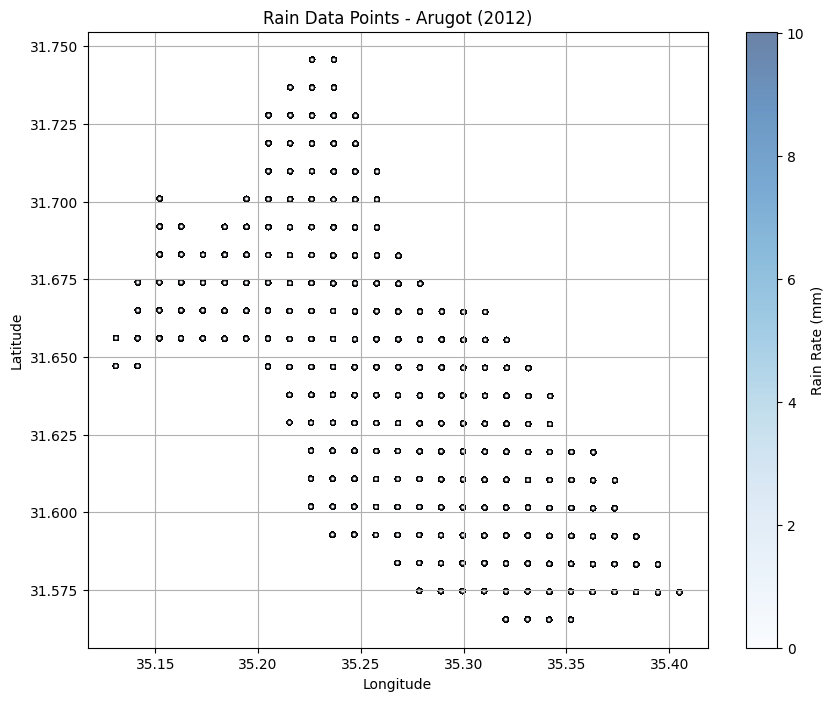

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ----- Configuration -----
# Path to the Arugot rain file for 2012
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2013_Darga.csv"

# ----- Load Data -----
# Load the rain data
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded: {file_path}")
else:
    print(f"File not found: {file_path}")

# Check if necessary columns exist
if "longitude" not in df.columns or "latitude" not in df.columns or "rainrate" not in df.columns:
    raise ValueError("Missing required columns: 'long', 'lat', or 'rainrate' in the CSV file.")

# ----- Plot the Rain Points -----
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for rain points
sc = ax.scatter(
    df["longitude"], df["latitude"], 
    c=df["rainrate"], cmap="Blues", alpha=0.6, edgecolors="k", marker="o", 
    s=10  # Size of points
)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Rain Rate (mm)")

# Labels and title
ax.set_title("Rain Data Points - Arugot (2012)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2012_cut.csv


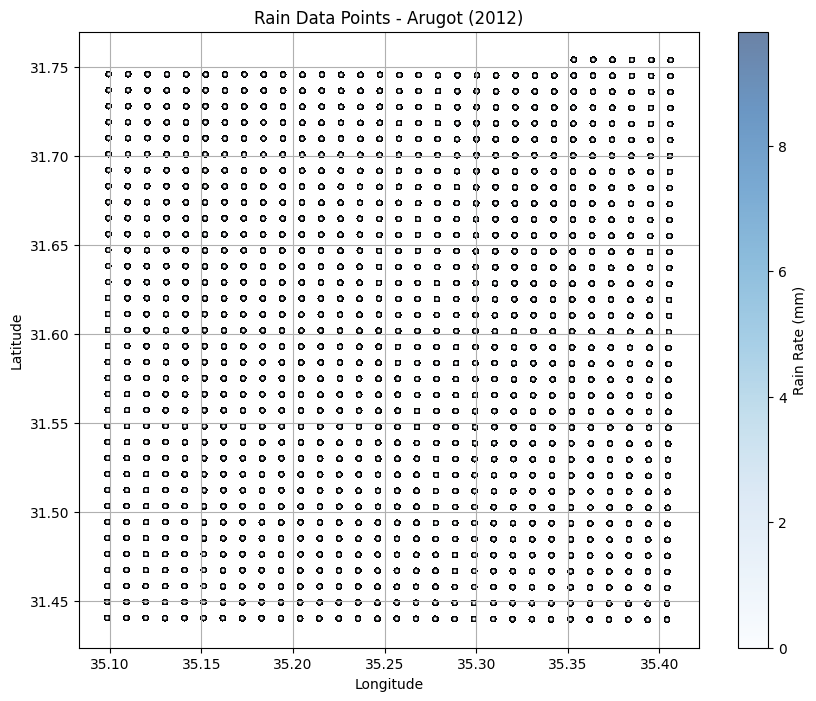

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ----- Configuration -----
# Path to the Arugot rain file for 2012
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2012_cut.csv"

# ----- Load Data -----
# Load the rain data
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded: {file_path}")
else:
    print(f"File not found: {file_path}")

# Check if necessary columns exist
if "longitude" not in df.columns or "latitude" not in df.columns or "rainrate" not in df.columns:
    raise ValueError("Missing required columns: 'long', 'lat', or 'rainrate' in the CSV file.")

# ----- Plot the Rain Points -----
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for rain points
sc = ax.scatter(
    df["longitude"], df["latitude"], 
    c=df["rainrate"], cmap="Blues", alpha=0.6, edgecolors="k", marker="o", 
    s=10  # Size of points
)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Rain Rate (mm)")

# Labels and title
ax.set_title("Rain Data Points - Arugot (2012)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

In [15]:
import os
import pandas as pd
import re  # Use regex to extract years

# ----- Configuration -----
DATA_FOLDER = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"
OUTPUT_FOLDER = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)  # Ensure output folder exists

# Get all relevant files
files = sorted([f for f in os.listdir(DATA_FOLDER) if f.endswith(".csv")])

# ✅ Extract correct years from filenames
years = sorted(set(re.search(r"RM(\d{4})", f).group(1) for f in files if re.search(r"RM(\d{4})", f)))
print(f"Processing years: {years}")

# ----- Function to Load Data Efficiently -----
def load_data(file_path):
    """Load CSV data into Pandas DataFrame."""
    if not os.path.exists(file_path):
        print(f"⚠️ File not found: {file_path}")
        return None
    try:
        df = pd.read_csv(file_path, parse_dates=["time"])
        return df
    except Exception as e:
        print(f"❌ Error loading {file_path}: {e}")
        return None

# ----- Function to Compute Statistics (Now Includes 75th Percentile) -----
def compute_statistics(df, prefix):
    """Compute statistical measures (sum, avg, 75th & 90th percentile, median) for a given dataset."""
    if df is None or df.empty:
        print(f"⚠️ No data found for {prefix}. Skipping.")
        return None

    grouped = df.groupby("time")["rainrate"].agg(
        **{f"sum_rain_rate_{prefix}": "sum"},
        **{f"avg_rain_rate_{prefix}": "mean"},
        **{f"percentile_90_{prefix}": lambda x: x.quantile(0.9)},
        **{f"percentile_75_{prefix}": lambda x: x.quantile(0.75)},  # ✅ New feature: 75th percentile
        **{f"median_rain_rate_{prefix}": "median"},
    ).reset_index()

    return grouped

# ----- Process Each Year -----
for year in years:
    print(f"\n🚀 Processing Year: {year}")

    # **Fix: Use `_cut.csv` as the "all" dataset**
    all_file = os.path.join(DATA_FOLDER, f"North_Dead_Sea_RM{year}_cut.csv")
    arugot_file = os.path.join(DATA_FOLDER, f"North_Dead_Sea_RM{year}_Arugot.csv")
    darga_file = os.path.join(DATA_FOLDER, f"North_Dead_Sea_RM{year}_Darga.csv")

    # Load data
    df_all = load_data(all_file)
    df_arugot = load_data(arugot_file)
    df_darga = load_data(darga_file)

    # Compute statistics per region
    stats_all = compute_statistics(df_all, "all")
    stats_arugot = compute_statistics(df_arugot, "Arugot")
    stats_darga = compute_statistics(df_darga, "Darga")

    # Check if all three statistics are missing
    if stats_all is None and stats_arugot is None and stats_darga is None:
        print(f"❌ No valid data found for {year}. Skipping.")
        continue

    # Start merging with the first available DataFrame
    final_df = stats_all if stats_all is not None else pd.DataFrame(columns=["time"])
    if stats_arugot is not None:
        final_df = final_df.merge(stats_arugot, on="time", how="outer")
    if stats_darga is not None:
        final_df = final_df.merge(stats_darga, on="time", how="outer")

    # Ensure correct column order (Now Includes 75th Percentile)
    column_order = [
        "time",
        "sum_rain_rate_all", "avg_rain_rate_all", "percentile_90_all", "percentile_75_all", "median_rain_rate_all",
        "sum_rain_rate_Arugot", "avg_rain_rate_Arugot", "percentile_90_Arugot", "percentile_75_Arugot", "median_rain_rate_Arugot",
        "sum_rain_rate_Darga", "avg_rain_rate_Darga", "percentile_90_Darga", "percentile_75_Darga", "median_rain_rate_Darga"
    ]
    
    # Keep only available columns
    final_df = final_df[[col for col in column_order if col in final_df.columns]]

    # Save the statistics CSV
    output_file = os.path.join(OUTPUT_FOLDER, f"North_Dead_Sea_RM{year}_rain_statistics.csv")
    try:
        final_df.to_csv(output_file, index=False)
        print(f"✅ Saved statistics to: {output_file}")
    except Exception as e:
        print(f"❌ Error saving file {output_file}: {e}")

print("\n🎉 All years processed successfully!")


Processing years: ['2012', '2013', '2014', '2015', '2016', '2018', '2019', '2020']

🚀 Processing Year: 2012
✅ Saved statistics to: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs/North_Dead_Sea_RM2012_rain_statistics.csv

🚀 Processing Year: 2013
✅ Saved statistics to: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs/North_Dead_Sea_RM2013_rain_statistics.csv

🚀 Processing Year: 2014
✅ Saved statistics to: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs/North_Dead_Sea_RM2014_rain_statistics.csv

🚀 Processing Year: 2015
✅ Saved statistics to: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs/North_Dead_Sea_RM2015_rain_statistics.csv

🚀 Processing Year: 2016
✅ Saved statistics to: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs/Nort

In [16]:
import os
import pandas as pd

# ----- Configuration -----
# Path to the statistics data folder
statistics_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs"

# Get all CSV files in the statistics folder
files = sorted([f for f in os.listdir(statistics_folder) if f.endswith(".csv")])

# ----- Process Each File -----
print(f"📊 Found {len(files)} statistics files.")

# Loop through each file and print its shape
for file in files:
    file_path = os.path.join(statistics_folder, file)
    
    try:
        # Load the CSV
        df = pd.read_csv(file_path)
        
        # Print file name and its shape
        print(f"✅ {file}: {df.shape} (rows, columns)")
    
    except Exception as e:
        print(f"❌ Error loading {file}: {e}")

print("\n🎯 Done processing all statistics files.")


📊 Found 8 statistics files.
✅ North_Dead_Sea_RM2012_rain_statistics.csv: (52704, 16) (rows, columns)
✅ North_Dead_Sea_RM2013_rain_statistics.csv: (52560, 16) (rows, columns)
✅ North_Dead_Sea_RM2014_rain_statistics.csv: (52560, 16) (rows, columns)
✅ North_Dead_Sea_RM2015_rain_statistics.csv: (52560, 16) (rows, columns)
✅ North_Dead_Sea_RM2016_rain_statistics.csv: (52704, 16) (rows, columns)
✅ North_Dead_Sea_RM2018_rain_statistics.csv: (52560, 16) (rows, columns)
✅ North_Dead_Sea_RM2019_rain_statistics.csv: (52560, 16) (rows, columns)
✅ North_Dead_Sea_RM2020_rain_statistics.csv: (52704, 16) (rows, columns)

🎯 Done processing all statistics files.


In [18]:
import os
import pandas as pd

# ----- Configuration -----
# Path to the statistics data folder
statistics_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly update flow"

# Get all CSV files in the statistics folder
files = sorted([f for f in os.listdir(statistics_folder) if f.endswith(".csv")])

# ----- Process Each File -----
print(f"📊 Found {len(files)} flow files.")

# Loop through each file and print its shape
for file in files:
    file_path = os.path.join(statistics_folder, file)
    
    try:
        # Load the CSV
        df = pd.read_csv(file_path)
        
        # Print file name and its shape
        print(f"✅ {file}: {df.shape} (rows, columns)")
    
    except Exception as e:
        print(f"❌ Error loading {file}: {e}")

print("\n🎯 Done processing all statistics files.")


📊 Found 8 flow files.
✅ Northern Dead Sea_2012.csv: (118368, 7) (rows, columns)
✅ Northern Dead Sea_2013.csv: (117936, 7) (rows, columns)
✅ Northern Dead Sea_2014.csv: (117936, 7) (rows, columns)
✅ Northern Dead Sea_2015.csv: (117936, 7) (rows, columns)
✅ Northern Dead Sea_2016.csv: (118368, 7) (rows, columns)
✅ Northern Dead Sea_2018.csv: (117936, 7) (rows, columns)
✅ Northern Dead Sea_2019.csv: (117936, 7) (rows, columns)
✅ Northern Dead Sea_2020.csv: (118368, 7) (rows, columns)

🎯 Done processing all statistics files.


In [19]:
import os
import pandas as pd

# ----- File Paths -----
flow_file = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly update flow/Northern Dead Sea_2012.csv"
rain_file = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs/North_Dead_Sea_RM2012_rain_statistics.csv"

# ----- Function to Load and Show File Head -----
def show_file_head(file_path):
    """Load a CSV and display its first 5 rows."""
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path)
            print(f"✅ Loaded: {file_path}")
            display(df.head())  # Show in Jupyter Notebook
        except Exception as e:
            print(f"❌ Error loading {file_path}: {e}")
    else:
        print(f"❌ File not found: {file_path}")

# ----- Show First 5 Rows of Each File -----
print("\n📊 Flow Data (First 5 Rows):")
show_file_head(flow_file)

print("\n🌧️ Rain Statistics Data (First 5 Rows):")
show_file_head(rain_file)



📊 Flow Data (First 5 Rows):
✅ Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly update flow/Northern Dead Sea_2012.csv


,name,shd_id,date,rg_qms,source,lon,lat
0,דרגה,48125,2012-01-01 00:00:00,0.0,HSI,35.36552,31.60015
1,דרגה,48125,2012-01-01 00:10:00,0.0,HSI,35.36552,31.60015
2,דרגה,48125,2012-01-01 00:20:00,0.0,HSI,35.36552,31.60015
3,דרגה,48125,2012-01-01 00:30:00,0.0,HSI,35.36552,31.60015
4,דרגה,48125,2012-01-01 00:40:00,0.0,HSI,35.36552,31.60015



🌧️ Rain Statistics Data (First 5 Rows):
✅ Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs/North_Dead_Sea_RM2012_rain_statistics.csv


,time,sum_rain_rate_all,avg_rain_rate_all,percentile_90_all,percentile_75_all,median_rain_rate_all,sum_rain_rate_Arugot,avg_rain_rate_Arugot,percentile_90_Arugot,percentile_75_Arugot,median_rain_rate_Arugot,sum_rain_rate_Darga,avg_rain_rate_Darga,percentile_90_Darga,percentile_75_Darga,median_rain_rate_Darga
0,2012-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-01-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import os
import pandas as pd

# ----- File Paths -----
flow_file = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly update flow/Northern Dead Sea_2012.csv"
rain_file = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs/North_Dead_Sea_RM2012_rain_statistics.csv"

# ----- Function to Load, Show Shape, and Display Head -----
def show_file_info(file_path):
    """Load a CSV, print its shape, and display its first 5 rows."""
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path)
            print(f"✅ Loaded: {file_path}")
            print(f"📏 Shape: {df.shape} (rows, columns)\n")  # Show file shape
            display(df.head())  # Show first 5 rows in Jupyter Notebook
        except Exception as e:
            print(f"❌ Error loading {file_path}: {e}")
    else:
        print(f"❌ File not found: {file_path}")

# ----- Show File Info -----
print("\n📊 Flow Data (Shape & First 5 Rows):")
show_file_info(flow_file)

print("\n🌧️ Rain Statistics Data (Shape & First 5 Rows):")
show_file_info(rain_file)



📊 Flow Data (Shape & First 5 Rows):
✅ Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly update flow/Northern Dead Sea_2012.csv
📏 Shape: (118368, 7) (rows, columns)



,name,shd_id,date,rg_qms,source,lon,lat
0,דרגה,48125,2012-01-01 00:00:00,0.0,HSI,35.36552,31.60015
1,דרגה,48125,2012-01-01 00:10:00,0.0,HSI,35.36552,31.60015
2,דרגה,48125,2012-01-01 00:20:00,0.0,HSI,35.36552,31.60015
3,דרגה,48125,2012-01-01 00:30:00,0.0,HSI,35.36552,31.60015
4,דרגה,48125,2012-01-01 00:40:00,0.0,HSI,35.36552,31.60015



🌧️ Rain Statistics Data (Shape & First 5 Rows):
✅ Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs/North_Dead_Sea_RM2012_rain_statistics.csv
📏 Shape: (52704, 16) (rows, columns)



,time,sum_rain_rate_all,avg_rain_rate_all,percentile_90_all,percentile_75_all,median_rain_rate_all,sum_rain_rate_Arugot,avg_rain_rate_Arugot,percentile_90_Arugot,percentile_75_Arugot,median_rain_rate_Arugot,sum_rain_rate_Darga,avg_rain_rate_Darga,percentile_90_Darga,percentile_75_Darga,median_rain_rate_Darga
0,2012-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-01-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
144*365

52560

In [25]:
import os
import pandas as pd

# Define the folder containing the CSV files
data_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs"

# Get all CSV files in the folder
files = sorted([f for f in os.listdir(data_folder) if f.endswith(".csv")])

# Define the date range to remove
start_date = "06-01 00:00"  # June 1, 00:00
end_date = "08-31 23:50"  # August 31, 23:50

# Process each file
for file in files:
    file_path = os.path.join(data_folder, file)
    
    # Load data with date parsing
    df = pd.read_csv(file_path, parse_dates=["time"])
    
    # Convert to string to check month-day and time
    df["time_str"] = df["time"].dt.strftime("%m-%d %H:%M")

    # Filter out the rows within the given date range
    df_filtered = df[~df["time_str"].between(start_date, end_date)]

    # Drop temporary column
    df_filtered = df_filtered.drop(columns=["time_str"])

    # Print number of rows before and after deletion
    print(f"✅ {file}: {df.shape[0]} rows → {df_filtered.shape[0]} rows after deletion")

    # Save to a temporary file for review (not overwriting the original yet)
    temp_file_path = os.path.join(data_folder, f"filtered_{file}")
    df_filtered.to_csv(temp_file_path, index=False)

print("\n🎯 All files processed. The filtered versions are saved with 'filtered_' prefix.")


✅ North_Dead_Sea_RM2012_rain_statistics.csv: 52704 rows → 39456 rows after deletion
✅ North_Dead_Sea_RM2013_rain_statistics.csv: 52560 rows → 39312 rows after deletion
✅ North_Dead_Sea_RM2014_rain_statistics.csv: 52560 rows → 39312 rows after deletion
✅ North_Dead_Sea_RM2015_rain_statistics.csv: 52560 rows → 39312 rows after deletion
✅ North_Dead_Sea_RM2016_rain_statistics.csv: 52704 rows → 39456 rows after deletion
✅ North_Dead_Sea_RM2018_rain_statistics.csv: 52560 rows → 39312 rows after deletion
✅ North_Dead_Sea_RM2019_rain_statistics.csv: 52560 rows → 39312 rows after deletion
✅ North_Dead_Sea_RM2020_rain_statistics.csv: 52704 rows → 39456 rows after deletion

🎯 All files processed. The filtered versions are saved with 'filtered_' prefix.


In [26]:
import os
import pandas as pd

# Define the folder containing the CSV files
data_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/rain statistic dfs"

# Get all CSV files in the folder
files = sorted([f for f in os.listdir(data_folder) if f.endswith(".csv")])

# Define the date range to remove
start_date = "06-01 00:00"  # June 1, 00:00
end_date = "08-31 23:50"  # August 31, 23:50

# Process each file
for file in files:
    file_path = os.path.join(data_folder, file)
    
    # Load data with date parsing
    df = pd.read_csv(file_path, parse_dates=["time"])
    
    # Convert to string to check month-day and time
    df["time_str"] = df["time"].dt.strftime("%m-%d %H:%M")

    # Filter out the rows within the given date range
    df_filtered = df[~df["time_str"].between(start_date, end_date)]

    # Drop temporary column
    df_filtered = df_filtered.drop(columns=["time_str"])

    # Print number of rows before and after deletion
    print(f"✅ {file}: {df.shape[0]} rows → {df_filtered.shape[0]} rows after deletion")

    # Overwrite the original file with the cleaned version
    df_filtered.to_csv(file_path, index=False)

print("\n🎯 All original files have been successfully updated.")


✅ North_Dead_Sea_RM2012_rain_statistics.csv: 52704 rows → 39456 rows after deletion
✅ North_Dead_Sea_RM2013_rain_statistics.csv: 52560 rows → 39312 rows after deletion
✅ North_Dead_Sea_RM2014_rain_statistics.csv: 52560 rows → 39312 rows after deletion
✅ North_Dead_Sea_RM2015_rain_statistics.csv: 52560 rows → 39312 rows after deletion
✅ North_Dead_Sea_RM2016_rain_statistics.csv: 52704 rows → 39456 rows after deletion
✅ North_Dead_Sea_RM2018_rain_statistics.csv: 52560 rows → 39312 rows after deletion
✅ North_Dead_Sea_RM2019_rain_statistics.csv: 52560 rows → 39312 rows after deletion
✅ North_Dead_Sea_RM2020_rain_statistics.csv: 52704 rows → 39456 rows after deletion
✅ filtered_North_Dead_Sea_RM2012_rain_statistics.csv: 39456 rows → 39456 rows after deletion
✅ filtered_North_Dead_Sea_RM2013_rain_statistics.csv: 39312 rows → 39312 rows after deletion
✅ filtered_North_Dead_Sea_RM2014_rain_statistics.csv: 39312 rows → 39312 rows after deletion
✅ filtered_North_Dead_Sea_RM2015_rain_statistics.

In [27]:
import os
import pandas as pd

# Define the folder containing the CSV files
data_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"

# Get all CSV files in the folder
files = sorted([f for f in os.listdir(data_folder) if f.endswith(".csv")])

# Define the date range to remove
start_date = "06-01 00:00"  # June 1, 00:00
end_date = "08-31 23:50"  # August 31, 23:50

# Process each file
for file in files:
    file_path = os.path.join(data_folder, file)
    
    # Load data with date parsing
    df = pd.read_csv(file_path, parse_dates=["time"])
    
    # Convert to string to check month-day and time
    df["time_str"] = df["time"].dt.strftime("%m-%d %H:%M")

    # Filter out the rows within the given date range
    df_filtered = df[~df["time_str"].between(start_date, end_date)]

    # Drop temporary column
    df_filtered = df_filtered.drop(columns=["time_str"])

    # Print number of rows before and after deletion
    print(f"✅ {file}: {df.shape[0]} rows → {df_filtered.shape[0]} rows after deletion")

    # Save to a temporary file for review (not overwriting the original yet)
    temp_file_path = os.path.join(data_folder, f"filtered_{file}")
    df_filtered.to_csv(temp_file_path, index=False)

print("\n🎯 All files processed. The filtered versions are saved with 'filtered_' prefix.")

✅ North_Dead_Sea_RM2012_Arugot.csv: 12280032 rows → 9193248 rows after deletion
✅ North_Dead_Sea_RM2012_Darga.csv: 12174624 rows → 9114336 rows after deletion
✅ North_Dead_Sea_RM2012_cut.csv: 55655424 rows → 41665536 rows after deletion
✅ North_Dead_Sea_RM2013_Arugot.csv: 12246480 rows → 9159696 rows after deletion
✅ North_Dead_Sea_RM2013_Darga.csv: 12141360 rows → 9081072 rows after deletion
✅ North_Dead_Sea_RM2013_cut.csv: 55503360 rows → 41513472 rows after deletion
✅ North_Dead_Sea_RM2014_Arugot.csv: 12246480 rows → 9159696 rows after deletion
✅ North_Dead_Sea_RM2014_Darga.csv: 12141360 rows → 9081072 rows after deletion
✅ North_Dead_Sea_RM2014_cut.csv: 55503360 rows → 41513472 rows after deletion
✅ North_Dead_Sea_RM2015_Arugot.csv: 12246480 rows → 9159696 rows after deletion
✅ North_Dead_Sea_RM2015_Darga.csv: 12141360 rows → 9081072 rows after deletion
✅ North_Dead_Sea_RM2015_cut.csv: 55503360 rows → 41513472 rows after deletion
✅ North_Dead_Sea_RM2016_Arugot.csv: 12280032 rows → 

In [28]:
12280032 - 9193248

3086784

In [29]:
import os
import pandas as pd

# Define the folder containing the CSV files
data_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"

# Get all CSV files in the folder
files = sorted([f for f in os.listdir(data_folder) if f.endswith(".csv")])

# Define the date range to remove
start_date = "06-01 00:00"  # June 1, 00:00
end_date = "08-31 23:50"  # August 31, 23:50

# Process each file
for file in files:
    file_path = os.path.join(data_folder, file)
    
    # Load data with date parsing
    df = pd.read_csv(file_path, parse_dates=["time"])
    
    # Convert to string to check month-day and time
    df["time_str"] = df["time"].dt.strftime("%m-%d %H:%M")

    # Filter out the rows within the given date range
    df_filtered = df[~df["time_str"].between(start_date, end_date)]

    # Drop temporary column
    df_filtered = df_filtered.drop(columns=["time_str"])

    # Print number of rows before and after deletion
    print(f"✅ {file}: {df.shape[0]} rows → {df_filtered.shape[0]} rows after deletion")

    # Overwrite the original file with the cleaned version
    df_filtered.to_csv(file_path, index=False)

print("\n🎯 All original files have been successfully updated.")

✅ North_Dead_Sea_RM2012_Arugot.csv: 12280032 rows → 9193248 rows after deletion
✅ North_Dead_Sea_RM2012_Darga.csv: 12174624 rows → 9114336 rows after deletion
✅ North_Dead_Sea_RM2012_cut.csv: 55655424 rows → 41665536 rows after deletion
✅ North_Dead_Sea_RM2013_Arugot.csv: 12246480 rows → 9159696 rows after deletion
✅ North_Dead_Sea_RM2013_Darga.csv: 12141360 rows → 9081072 rows after deletion
✅ North_Dead_Sea_RM2013_cut.csv: 55503360 rows → 41513472 rows after deletion
✅ North_Dead_Sea_RM2014_Arugot.csv: 12246480 rows → 9159696 rows after deletion
✅ North_Dead_Sea_RM2014_Darga.csv: 12141360 rows → 9081072 rows after deletion
✅ North_Dead_Sea_RM2014_cut.csv: 55503360 rows → 41513472 rows after deletion
✅ North_Dead_Sea_RM2015_Arugot.csv: 12246480 rows → 9159696 rows after deletion
✅ North_Dead_Sea_RM2015_Darga.csv: 12141360 rows → 9081072 rows after deletion
✅ North_Dead_Sea_RM2015_cut.csv: 55503360 rows → 41513472 rows after deletion
✅ North_Dead_Sea_RM2016_Arugot.csv: 12280032 rows → 

Total records in file: 41665536
Using first timestamp: 2012-01-01 00:00:00
Number of records at first timestamp: 1056


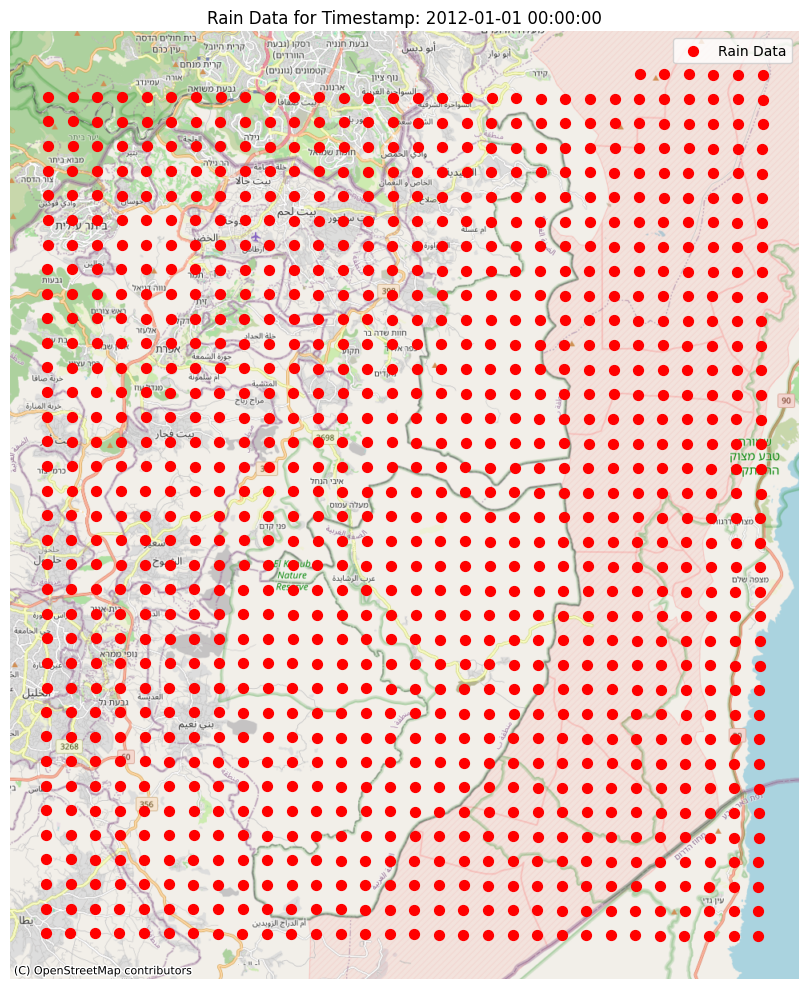

In [37]:
#!/usr/bin/env python3
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx  # for adding a basemap

# --- Configuration ---
# Full path to your CSV file
csv_path = r'/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to "spatial PINN Hebrew"/filtered_North_Dead_Sea_RM2012_cut.csv'

# Column names (adjust if necessary)
timestamp_col = 'time'  # change if your file uses a different column name
lat_col = 'latitude'              # change if your file uses a different column name (e.g., "latitude")
lon_col = 'longitude'              # change if your file uses a different column name (e.g., "longitude")

# --- Step 1: Read the CSV file ---
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV file not found: {csv_path}")

# Read CSV; if your timestamp column is not automatically parsed, you can add parse_dates=[timestamp_col]
df = pd.read_csv(csv_path, parse_dates=[timestamp_col])
print(f"Total records in file: {len(df)}")

# --- Step 2: Select the first timestamp ---
# Assumes the data is sorted by timestamp; if not, you may need to sort it first.
first_timestamp = df[timestamp_col].iloc[0]
print(f"Using first timestamp: {first_timestamp}")

# Filter rows corresponding to the first timestamp.
df_first = df[df[timestamp_col] == first_timestamp]
print(f"Number of records at first timestamp: {len(df_first)}")

# --- Step 3: Convert to a GeoDataFrame ---
# Check that the latitude and longitude columns exist.
if lat_col not in df_first.columns or lon_col not in df_first.columns:
    raise ValueError(f"Expected columns '{lat_col}' and '{lon_col}' not found in the CSV.")

# Create a GeoDataFrame using the longitude and latitude data
gdf = gpd.GeoDataFrame(
    df_first,
    geometry=gpd.points_from_xy(df_first[lon_col], df_first[lat_col]),
    crs="EPSG:4326"  # assuming coordinates are in WGS84
)

# Reproject to Web Mercator (EPSG:3857) for compatibility with most basemaps
gdf = gdf.to_crs(epsg=3857)

# --- Step 4: Plot the data ---
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='red', markersize=50, label='Rain Data')

# Add a basemap using OpenStreetMap Mapnik tiles.
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Improve the plot appearance
ax.set_title(f"Rain Data for Timestamp: {first_timestamp}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

# Optionally remove axis clutter
ax.set_axis_off()

plt.tight_layout()
plt.show()


Total records in file: 41665536
Timestamps to plot: [Timestamp('2012-01-01 00:00:00'), Timestamp('2012-01-01 00:10:00'), Timestamp('2012-01-01 00:20:00')]
Number of records for 2012-01-01 00:00:00: 1056
Number of records for 2012-01-01 00:10:00: 1056
Number of records for 2012-01-01 00:20:00: 1056


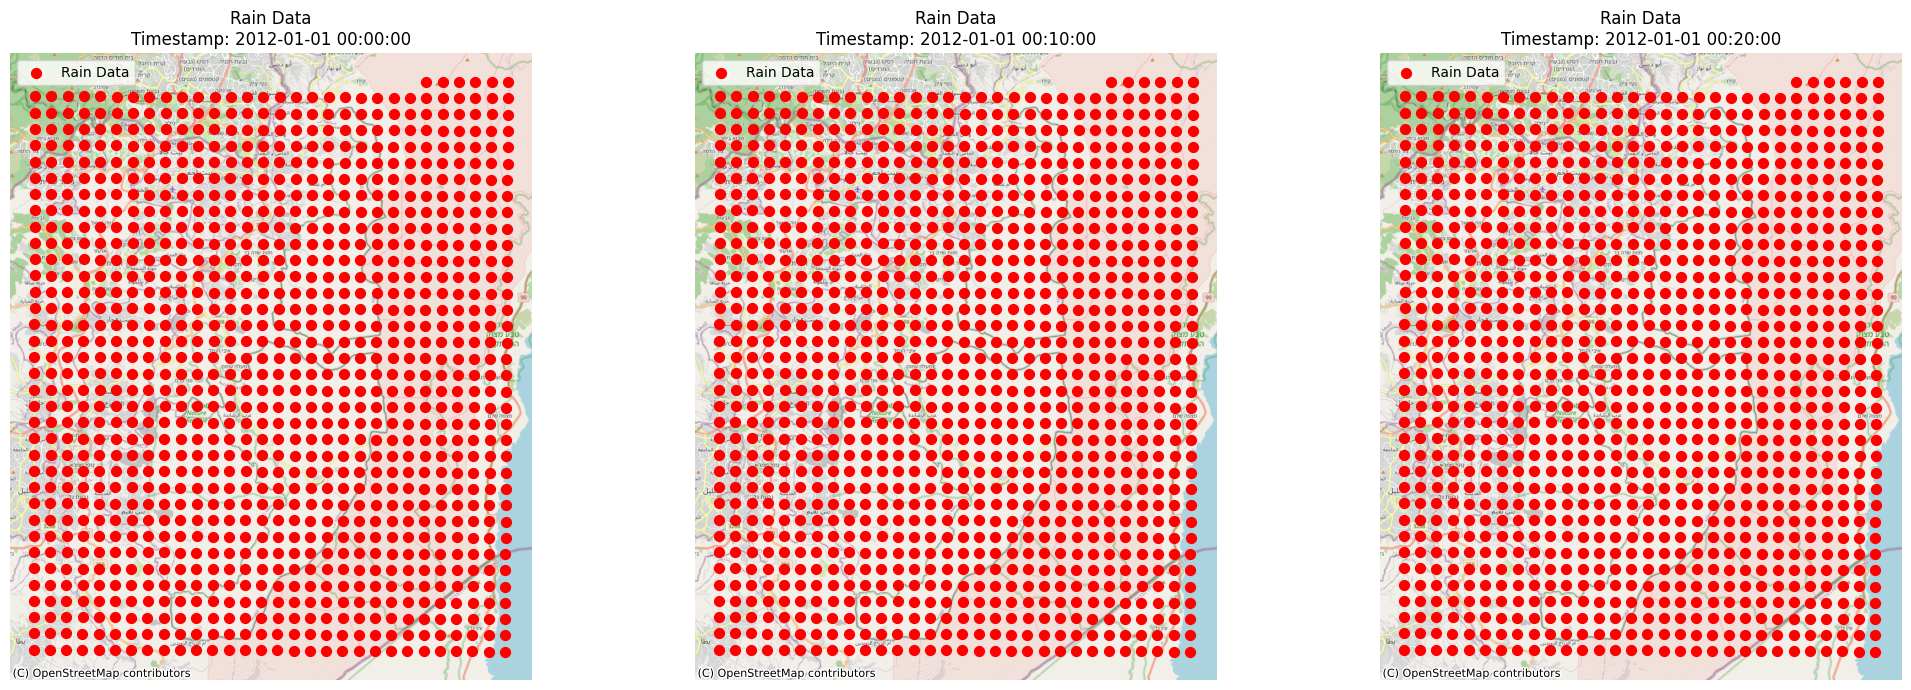

In [38]:
#!/usr/bin/env python3
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx  # for adding a basemap

# --- Configuration ---
csv_path = r'/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to "spatial PINN Hebrew"/filtered_North_Dead_Sea_RM2012_cut.csv'
timestamp_col = 'time'        # adjust as needed
lat_col = 'latitude'          # adjust as needed
lon_col = 'longitude'         # adjust as needed

# --- Step 1: Read the CSV file ---
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV file not found: {csv_path}")

# Read the CSV and parse the timestamp column
df = pd.read_csv(csv_path, parse_dates=[timestamp_col])
print(f"Total records in file: {len(df)}")

# --- Step 2: Get three unique timestamps ---
# Ensure the timestamps are sorted so that the first three are used.
unique_timestamps = sorted(df[timestamp_col].unique())
if len(unique_timestamps) < 3:
    raise ValueError("Less than 3 unique timestamps found in the dataset.")

# Select the first three timestamps
timestamps_to_plot = unique_timestamps[:3]
print("Timestamps to plot:", timestamps_to_plot)

# --- Step 3: Set up subplots ---
fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharex=True, sharey=True)

# --- Step 4: Plot data for each timestamp ---
for ax, ts in zip(axes, timestamps_to_plot):
    # Filter rows corresponding to the current timestamp
    df_ts = df[df[timestamp_col] == ts]
    print(f"Number of records for {ts}: {len(df_ts)}")
    
    # Check that the necessary columns exist
    if lat_col not in df_ts.columns or lon_col not in df_ts.columns:
        raise ValueError(f"Expected columns '{lat_col}' and '{lon_col}' not found in the CSV.")
    
    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(
        df_ts,
        geometry=gpd.points_from_xy(df_ts[lon_col], df_ts[lat_col]),
        crs="EPSG:4326"  # assuming coordinates are in WGS84
    )
    
    # Reproject to Web Mercator for compatibility with basemaps
    gdf = gdf.to_crs(epsg=3857)
    
    # Plot the points
    gdf.plot(ax=ax, marker='o', color='red', markersize=50, label='Rain Data')
    
    # Add the basemap (using OpenStreetMap Mapnik tiles)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    
    # Customize the subplot
    ax.set_title(f"Rain Data\nTimestamp: {ts}")
    ax.legend()
    ax.set_axis_off()

plt.tight_layout()
plt.show()
